### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import random
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

### Visualizing the dataset

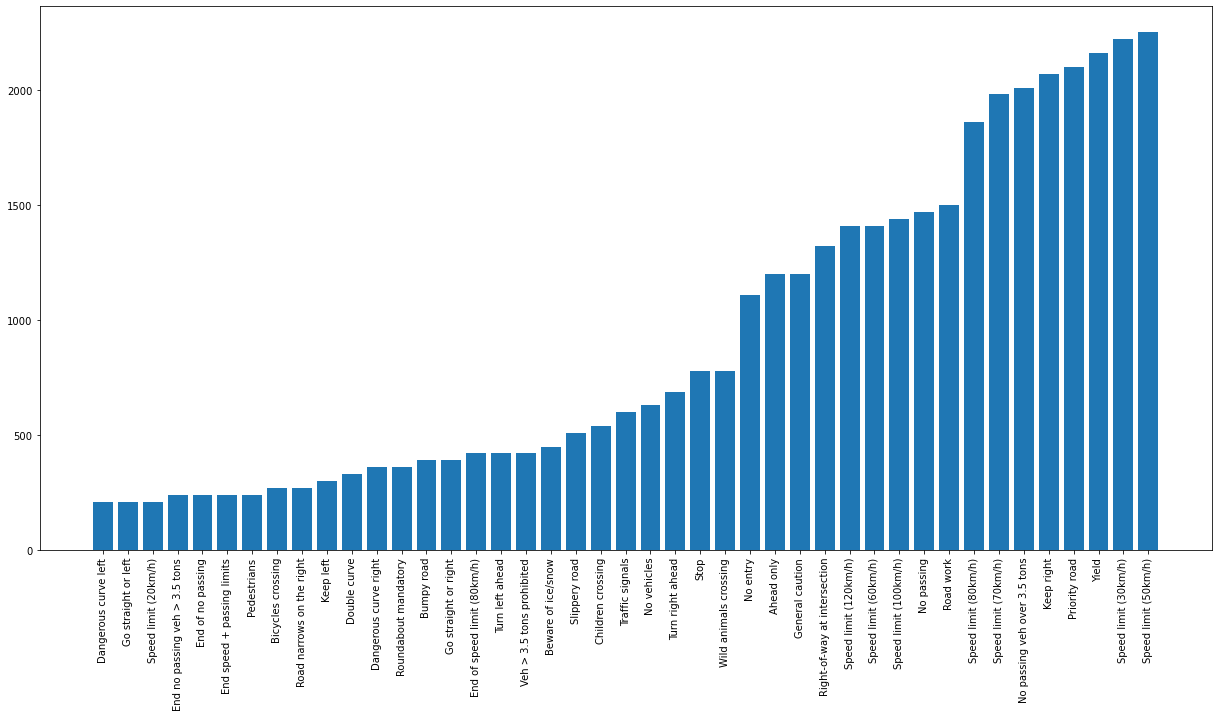

In [3]:
path = "E:/GTSRB/Train"
folders = os.listdir("E:/GTSRB/Train")
train_no = []
class_no = []
for folder in folders:
    train_imgs = os.listdir(path + "/" + folder)
    train_no.append(len(train_imgs))
    class_no.append(classes[int(folder)])
# Sorting the dataset on the basis of number of images in each class
zipped_list = zip(train_no, class_no)
sorted_list = sorted(zipped_list)
tuples = zip(*sorted_list)
train_number, class_num = [list(tuple) for tuple in  tuples]
# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

### Reading Images

In [4]:
path = "E:/GTSRB/Train"
count = 0
images = []
label = []
classes_list = os.listdir(path)
print("Total Classes:",len(classes_list))
no_of_classes = len(classes_list)
print("importing classes...")
for x in range(0, len(classes_list)):
    img_list = os.listdir(path + "/" + str(count))
    for y in img_list:
        img = cv2.imread(path + "/" + str(count) + "/" + y)
        img = cv2.resize(img, (32,32))
        images.append(img)
        label.append(count)
    print(count, end = " ")
    count += 1
print(" ")

Total Classes: 43
importing classes...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


### converting the images into (32,32,3) where (32,32) is the size of the image and 3 is RGB channel for input

In [5]:
images = np.array(images)
classNo = np.array(label)
data = images.reshape(-1,32,32,3)

In [6]:
images = np.array(images)
classNo = np.array(label)
data= np.array(images).reshape(-1, 32, 32, 3)

In [7]:
data.shape

(39209, 32, 32, 3)

### Splitting dataset
#### Splitting dataset into train, test and validation. 60% train data, 20% test data and 20% for validation data.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, classNo, test_size=0.2)
y_Tests = y_test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print("Dataset Shapes")
print("Train Size", end = "")
print(X_train.shape, y_train.shape)
print("Validation Size", end = "")
print(X_val.shape, y_val.shape)
print("Test Size", end = "")
print(X_test.shape, y_test.shape)

Dataset Shapes
Train Size(25093, 32, 32, 3) (25093,)
Validation Size(6274, 32, 32, 3) (6274,)
Test Size(7842, 32, 32, 3) (7842,)


### Data Preprocessing

#### Apply some image processing on training, validation and test images like convert image into grayscale, histogram equalization and image normalization etc.

In [9]:
def grey_scale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img = cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grey_scale(img)
    img = equalize(img)
    img = img/255
    return img
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

# Reshape into channel 1 we have converted rgb to greyscale
X_train = X_train.reshape(-1, 32, 32, 1)
X_val = X_val.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)

In [10]:
X_test.shape

(7842, 32, 32, 1)

### Data Augmentation

I have performed data augmentation to generate more generic data. I have set different parameters for augmentation like width and height shift range is 10%, zoom range is 0.2 and rotation range is 10 degree. batch_size=20 means that 20 images are augmented at the same time.

In [11]:
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
dataGen.fit(X_train)
batches = dataGen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

#### converting label class variable to binary class matrix (one hot encoding using to categorical function)

In [12]:
y_train = to_categorical(y_train, no_of_classes)
y_val = to_categorical(y_val, no_of_classes)
y_test = to_categorical(y_test, no_of_classes)

In [13]:
y_test.shape

(7842, 43)

## CNN model

In [14]:
def seq_model():
    no_filters     = 60
    size_of_filter1 = (5,5)
    size_of_filter2 = (3,3)
    size_of_pool    = (2,2)
    no_of_nodes     = 500
    model           = Sequential()
    model.add((Conv2D(no_filters, size_of_filter1, input_shape = (32,32,1), activation = "relu")))
    model.add((Conv2D(no_filters, size_of_filter1, activation = "relu")))
    model.add(MaxPooling2D(pool_size = size_of_pool))
    
    model.add((Conv2D(no_filters//2, size_of_filter2, activation = "relu")))
    model.add((Conv2D(no_filters//2, size_of_filter2, activation = "relu")))
    model.add(MaxPooling2D(pool_size = size_of_pool))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(no_of_nodes, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(no_of_classes, activation = "softmax"))
    model.compile(Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])
    return model
model = seq_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

### Train model

In [15]:
batch_size_val = 30
steps_per_epoch_val = 500
epochs_val = 40

#Train the model
history = model.fit(dataGen.flow(X_train, y_train, batch_size = batch_size_val), 
                   steps_per_epoch = steps_per_epoch_val, epochs = epochs_val,
                   validation_data = (X_val, y_val), shuffle = 1)

Epoch 1/40
500/500 [==============================] - 34s 68ms/step - loss: 2.8738 - accuracy: 0.2195 - val_loss: 1.2189 - val_accuracy: 0.6611
Epoch 2/40
500/500 [==============================] - 32s 65ms/step - loss: 1.5533 - accuracy: 0.5352 - val_loss: 0.5314 - val_accuracy: 0.8747
Epoch 3/40
500/500 [==============================] - 31s 63ms/step - loss: 1.1158 - accuracy: 0.6567 - val_loss: 0.3033 - val_accuracy: 0.9147
Epoch 4/40
500/500 [==============================] - 36s 72ms/step - loss: 0.8643 - accuracy: 0.7302 - val_loss: 0.1896 - val_accuracy: 0.9439
Epoch 5/40
500/500 [==============================] - 32s 65ms/step - loss: 0.7328 - accuracy: 0.7731 - val_loss: 0.1390 - val_accuracy: 0.9605
Epoch 6/40
500/500 [==============================] - 34s 68ms/step - loss: 0.6194 - accuracy: 0.8061 - val_loss: 0.1085 - val_accuracy: 0.9700
Epoch 7/40
500/500 [==============================] - 33s 67ms/step - loss: 0.5530 - accuracy: 0.8283 - val_loss: 0.1184 - val_accuracy:

### Plot the graph

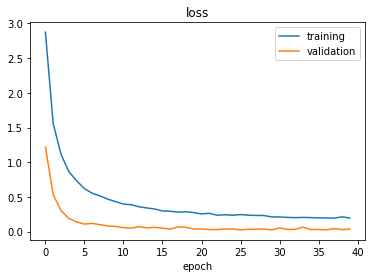

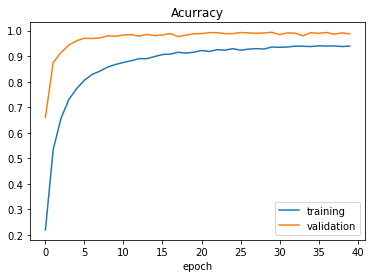

In [16]:
##Plot Graph##
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

### Test the model on the test dataset

In [17]:
#model testing
score = model.evaluate(X_test,y_test,verbose=0)       
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

Test Score: 0.033248014748096466
Test Accuracy: 0.9903085827827454


### Confusion Matrix

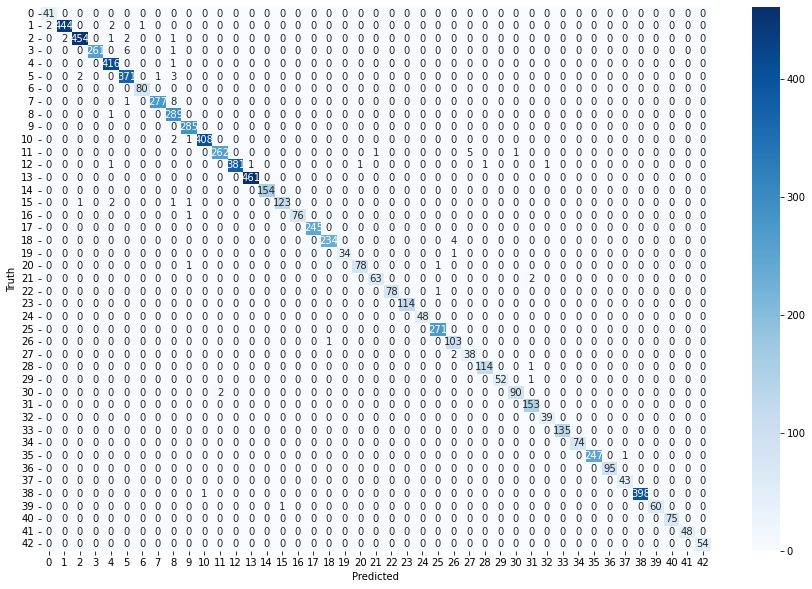

In [21]:
y_pred = model.predict(X_test)
# y_pred returns the probability values for all 43 classes but we need only the index of the largest probablity value that is our predicted class
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_Tests, y_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True, cmap = "Blues", fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig("Confusion_Matrix.png", dpi = 300, bbox_inches = 'tight')

In [19]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)